- http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm

C:\Users\Kyung\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1단계 : 데이터준비 (여러 데이터를 합치고 정리)

In [4]:
import glob
import os

all_files = glob.glob(os.path.join('winequality*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [5]:
all_data_frames = []
for file in all_files:
    data_frame = pd.read_csv(file, index_col=None, sep=';', header=0)
    all_data_frames.append(data_frame)
all_data_frames

[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 5               7.4             0.660         0.00             1.8      0.075   
 6               7.9             0.600         0.06             1.6      0.069   
 7               7.3             0.650         0.00             1.2      0.065   
 8               7.8             0.580         0.02             2.0      0.073   
 9               7.5             0.500         0.36             6.1      0.071   
 10              6.7             0.580         0.08             1.8      0.097   
 11             

In [6]:
wine = pd.concat(all_data_frames, axis=0, ignore_index=True) #axis=0 수직, axis=1 수평

wine

wine.to_csv("winequality_both.csv", index = False)

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- 위 방법이외에 red와 white를 각각 따로 불러와서 CONCAT하는 방법도 있음!

In [8]:
red_wine = pd.read_csv('winequality-red.csv', sep=';', header=0, index_col=None)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
red_wine["type"] = "red"
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [10]:
white_wine = pd.read_csv('winequality-white.csv', sep=';', header=0, index_col=None)
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
white_wine["type"] = "white"
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [12]:
wine = pd.concat([red_wine, white_wine], axis=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [13]:
wine.columns = wine.columns.str.replace(' ', '_')
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [14]:
#변수별 요약통계
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [15]:
# quality열에서 유니크한 값 
print(wine.quality.unique())
print(sorted(wine.quality.unique()))

[5 6 7 4 8 3 9]
[3, 4, 5, 6, 7, 8, 9]


In [16]:
# quality열에서 유일한 값별 관측값 개수를 내럼차순으로 정렬하여 출력
# quality6가 가장 많음. 
print(wine.quality.value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


# 2단계: 탐색적 분석

## 그룹화, 히스토그램, t검정

### 와인 종류에 따른 기술 통계를 출력하기

In [17]:
wine.groupby('type')[['quality']].describe()

quality                                             
        count      mean       std  min  25%  50%  75%  max
type                                                      
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0

In [18]:
wine.groupby('type')[['quality']].describe().unstack('type') #가로방향으로 재구조화

                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64

- 와인별로 히스토그램을 그려보고, 와인종류에 따라 품질의 차이가 있는지 검증해보자

In [19]:
# 와인종류에 따른 품질의 분포 확인하기
red_wine = wine.loc[wine['type']=='red', 'quality']
white_wine = wine.loc[wine['type']=='white', 'quality']
print(red_wine.head())
print(white_wine.head())

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64
0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


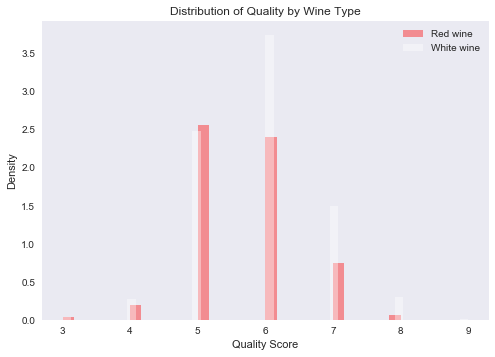

In [21]:
#빈도분포대신 밀도 분포로 표시
sns.set_style("dark")
print(sns.distplot(red_wine, \
		norm_hist=True, kde=False, color="red", label="Red wine"))
print(sns.distplot(white_wine, \
		norm_hist=True, kde=False, color="white", label="White wine"))
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()

- Lesson Learnd:
- 두 그룹의 와인모두의 품질은 근사적으로 정규분표를 따르고 있음
- 분포를 히스토그램을 사용하면 단순히 요약통계를 보는 것보다 두 그룹의 분포를 보다 명확하게 알 수 있음

### T검정
- 와인 종류에 따른 품질의 차이각 통계적으로 유의한지 알기 위해 
- groupby 및 agg함수를 사용하여 그룹별 품질의 평균과 표준편차를 구함
- 두그룹모두 표준편차가 작으므로 합동분산 t검정을 실시할 예정임
- p값은 0.0000으로 유의한 수준임 -> 두 그룹간의 품질차이각 통계적으로 유의함

In [22]:
# Test whether mean quality is different between red and white wines
print(wine.groupby(['type'])[['quality']].agg(['std', 'mean']))

        quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909


In [23]:
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f  pvalue: %.4f' % (tstat, pvalue))

tstat: -9.686  pvalue: 0.0000


### 상관관계분석

In [24]:
# Calculate correlation matrix for all variables
#모든변수 쌍 사이의 상관계수를 구함
print(wine.corr())

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

- Lesson Learnd:
- 알콜, 이산화황, 산성도, 이산화황, 구연산은 품질고가 양의 상관관계가 있음
- 결합산, 휘발산, 잔여설탕, 염화물, 총이산화황, 밀도는 품지롸 음의 상관관계가 있음

- 몇개의 변수 쌍에 대해 회귀선을 포함한 산점도를 그려보자 

- 몇개의 샘플만 표시 (6000개 이상의 관측값을 그림으로 표시하면 알아보기까 힘듬)

In [25]:
def take_sample(data_frame, replace=False, n=200):
	return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]	

In [26]:
reds = wine.loc[wine['type']=='red']
whites = wine.loc[wine['type']=='white', :]
reds.shape

(1599, 13)

In [27]:
#reds_sample = take_sample(wine.loc[wine['type']=='red', :])

In [28]:
reds_sample = take_sample(reds)
reds_sample.shape

(200, 13)

In [29]:
#reds_sample

In [30]:
#whites_sample = take_sample(wine.loc[wine['type']=='white', :])
whites_sample = take_sample(whites)
whites_sample.shape

(200, 13)

In [31]:
#하나의 샘플로 합치기
wine_sample = pd.concat([reds_sample, whites_sample])

In [32]:
wine_sample.shape

(400, 13)

In [33]:
#새로운 in_sample열을 만들고, numpy의 where과 pandas의 isin함수를 사용하여
#wine데이터프레임의 인덱스값이 wine_sample데이터프레임의 인덱스값과 일치하는지에 따라 in_sample열을 1또는 0으로 채운다
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1.,0.)

In [34]:
# reds_sample = reds.loc[np.random.choice(reds.index, 100)]
# whites_sample = whites.loc[np.random.choice(whites.index, 100)]
# wine_sample = pd.concat([reds_sample, whites_sample], ignore_index=True)

In [35]:
print(wine['in_sample'])
print(pd.crosstab(wine.in_sample, wine.type, margins=True))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      1.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      1.0
28      0.0
29      0.0
       ... 
4868    0.0
4869    0.0
4870    0.0
4871    0.0
4872    0.0
4873    0.0
4874    0.0
4875    0.0
4876    0.0
4877    1.0
4878    0.0
4879    0.0
4880    0.0
4881    0.0
4882    0.0
4883    0.0
4884    0.0
4885    0.0
4886    0.0
4887    0.0
4888    0.0
4889    1.0
4890    0.0
4891    0.0
4892    0.0
4893    0.0
4894    0.0
4895    0.0
4896    0.0
4897    0.0
Name: in_sample, Length: 6497, dtype: float64
type        red  white   All
in_sample                   
0.0        1347   4508  5855
1.0         252    390   642
All        1599   4898  6497


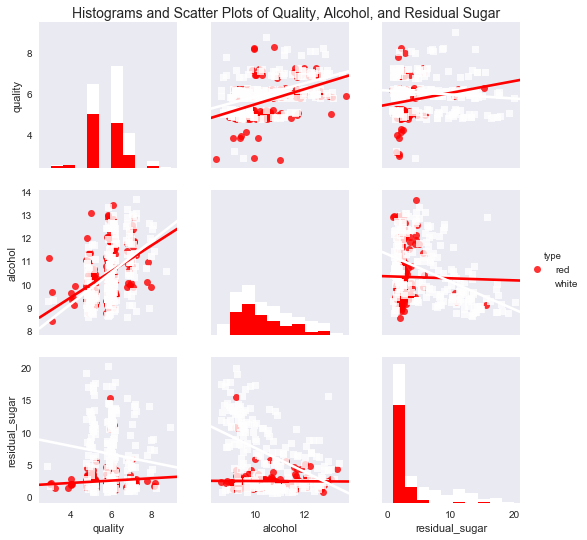

In [36]:
g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci": False, "x_jitter": 0.25, "y_jitter": 0.25}, \
hue='type', diag_kind='hist', diag_kws={"bins": 10, "alpha": 1.0}, palette=dict(red="red", white="white"), \
markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar'])


print(g)
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual Sugar', fontsize=14, \
		horizontalalignment='center', verticalalignment='top',
		x=0.5, y=0.999)
plt.show()

- Lesson Learnd:
- 알콜도수의 평균과 표준편차는 두그룹이 비슷
- 잔영설탕의 평균과 표준편차는 화이트와인이 레드와인보다 큼
- 회귀선을 보면 와인종류에 관계없이 알코올 도숙가 증가하면 품질이 높아지고, 
- 잔여설탕이 증가하면 품질이 낮아짐을 알수 있음
- 두경우 모두 레드와인의 효과가 더 큼

# 3단계:예측모델생성 - 학습하기

- 최소제곱법을 이용한 선형회귀분석
- why? 각 독립변수가 종속변수에 미치는 관계를 측정하기 위해!
- 선형회귀 : 독립변수가 통제된 상황에서 독립변수와 종속변수 사이의 관계를 파악할 수 있음

In [37]:
# Fit a multivariate linear regression model
#wine_standardized = (wine - wine.mean()) / wine.std()
# ~은 왼쪽변수는 종속변수, 오른쪽은 독립변수들
#formula_all = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'
my_formula = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'
#formula_all = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'
#formula = 'quality ~ residual_sugar + alcohol'
lm = ols(my_formula, data=wine).fit() #보통최소제곱볍모형으로 회귀모형을 만듬. 학습하기
#lm = glm(my_formula, data=wine, family=sm.families.Gaussian()).fit() #일반화선형모형을 사용하여 같은 데이터에 적용하는 방법을 보여줌
#lm = smf.glm(formula_all, data=wine_standardized, family=sm.families.Gaussian()).fit()
print(lm.summary())#통계량을 화면에 출력
print("\nQuantities you can extract from the result:\n%s" % dir(lm))#lm에서 추출할 수 있는 모든 통계량을 리스트형태로 출력ㄱ
print("\nCoefficients:\n%s" % lm.params)#회귀계수
print("\nCoefficient Std Errors:\n%s" % lm.bse)#표준오차
print("\nAdj. R-squared:\n%.2f" % lm.rsquared_adj)#수정결정계수
print("\nF-statistic: %.1f  P-value: %.2f" % (lm.fvalue, lm.f_pvalue))#F통계량 및 p값
print("\nNumber of obs: %d  Number of fitted values: %s" % (lm.nobs, len(lm.fittedvalues)))#적합값

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:56:29   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

In [38]:
lm.params['alcohol']

0.2670300088387592

In [39]:
lm.bse

Intercept               11.893899
alcohol                  0.016728
chlorides                0.332683
citric_acid              0.079619
density                 12.137473
fixed_acidity            0.015573
free_sulfur_dioxide      0.000751
pH                       0.090371
residual_sugar           0.005156
sulphates                0.076123
total_sulfur_dioxide     0.000277
volatile_acidity         0.077373
dtype: float64

#### 독립변수의 표준화 

- 회귀모형에서 사용하는 보통최소제곱법은 잔차의 제곱합을 최소화하는 회귀선을 찾아서 회귀계수를 추정함
- 잔차: 관측값-적합값
- 독립변수의 측정단위에 따라 크기가 크게 달라질수 있음
- 독립변수를 표준화하면 모형을 해석하기가 더 용이함
- 표준화방법 : 변수의 관측값에서 평균을 빼고 그 결과를 표준편차로 나누는것
- 표준화된 변수는 평균은 0이고 표준편차는 1이 됨. 

In [40]:
# Fit a multivariate linear model with standardized independent variables
dependent_variable = wine['quality']
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]
independent_variables_standardized = (independent_variables - independent_variables.mean()) / independent_variables.std()
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis=1)
lm_standardized = ols(my_formula, data=wine_standardized).fit()
print(lm_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:56:30   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184 

# 예측하기

- 회귀모형에 피팅하는데 사용하지 않은 새로운 데이터에 대한 예측이 필요함
- 새로운 관측값이 생겼을때 그 품질을 예측하고 싶은 경우임. 

In [41]:
# Predict quality scores for "new" observations
new_observations = wine.loc[wine.index.isin(range(10)), independent_variables.columns]
y_predicted = lm.predict(new_observations)
y_predicted_rounded = [round(score, 2) for score in y_predicted]#소수둘째자리로 반올림하여 출력
print(y_predicted_rounded)

[5.0, 4.92, 5.03, 5.68, 5.0, 5.04, 5.02, 5.3, 5.24, 5.69, 5.56, 5.28, 5.88, 5.7, 5.7, 5.88, 5.5, 5.56, 5.28, 5.93]


# 모델평가